### NBA
Vamos utilizar a API da NBA para entender os principais jogadores das finais.<br>
<strong>O que fazer</strong>: consulta a API através de módulos e funções de uma biblioteca<br>
<strong>Documentação</strong>: https://github.com/swar/nba_api<br>
<strong>Objetivo</strong>: Qual a distância média de arremessos dos jogadores Kawhi Leonard e Stephen Curry na temporada 18/19<br>
<strong>Desafio</strong>: Plote um gráfico comparando o perfil de localização dos arremessos.<br>
<strong>Dica</strong>: A biblioteca tem muitos módulos e funções. Seja objetivo em encontrar aqueles que interessam ao problema

In [1]:
# !pip install nba_api

In [2]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nba_api

from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import shotchartdetail

In [3]:
# Get all teams.
teams_df = pd.DataFrame(teams.get_teams())
teams_df

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [4]:
type(players.get_active_players()[0])

dict

In [5]:
# Get all active players.
players_df = pd.DataFrame(players.get_active_players())
players_df.head()

,id,full_name,first_name,last_name,is_active
0,203500,Steven Adams,Steven,Adams,True
1,1628389,Bam Adebayo,Bam,Adebayo,True
2,200746,LaMarcus Aldridge,LaMarcus,Aldridge,True
3,1629734,Kyle Alexander,Kyle,Alexander,True
4,1629638,Nickeil Alexander-Walker,Nickeil,Alexander-Walker,True


In [6]:
team1_id = teams_df[teams_df['nickname']=='Raptors']['id']
team2_id = teams_df[teams_df['nickname']=='Warriors']['id']
player1_id = players_df[players_df['full_name']=='Kawhi Leonard']['id']
player2_id = players_df[players_df['full_name']=='Stephen Curry']['id']

In [7]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team1_id, vs_team_id_nullable=team2_id)
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612761,TOR,Toronto Raptors,0022000737,2021-04-02,TOR vs. GSW,W,239,130,...,0.840,10,43,53,26,14,8,12,17,53.0
1,22020,1610612761,TOR,Toronto Raptors,0022000148,2021-01-10,TOR @ GSW,L,239,105,...,0.636,13,35,48,20,8,10,10,22,-1.0
2,22019,1610612761,TOR,Toronto Raptors,0021900929,2020-03-05,TOR @ GSW,W,240,121,...,0.903,3,36,39,28,10,3,11,24,8.0
3,22019,1610612761,TOR,Toronto Raptors,1521900020,2019-07-07,TOR @ GSW,L,200,71,...,0.667,11,31,42,11,10,3,18,23,-10.0
4,42018,1610612761,TOR,Toronto Raptors,0041800406,2019-06-13,TOR @ GSW,W,241,114,...,0.793,11,28,39,25,8,2,12,23,4.0


In [8]:
games.groupby('WL')[['WL']].count()

,WL
WL,
L,34
W,25


In [9]:
# context_measure_simple por default vem com PTS (pontos). Significa que contabiliza apenas os shots que acertaram.
# FGA (Field goal attempts) contabiliza todos
shots1 = shotchartdetail.ShotChartDetail(team_id=team1_id,player_id=player1_id,context_measure_simple='FGA', season_nullable='2018-19')
shots1_df = shots1.get_data_frames()[0]
shots2 = shotchartdetail.ShotChartDetail(team_id=team2_id,player_id=player2_id,context_measure_simple='FGA', season_nullable='2018-19')
shots2_df = shots2.get_data_frames()[0]

In [10]:
# View the head of the DataFrame and all its columns
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(shots1_df.head())
    display(shots2_df.head())

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800008,9,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,11,24,Missed Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,21,13,214,1,0,20181017,TOR,CLE
1,Shot Chart Detail,0021800008,28,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,9,47,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,12,118,44,1,0,20181017,TOR,CLE
2,Shot Chart Detail,0021800008,45,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,8,31,Missed Shot,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,12,-34,120,1,0,20181017,TOR,CLE
3,Shot Chart Detail,0021800008,53,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,8,3,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,2,12,1,1,20181017,TOR,CLE
4,Shot Chart Detail,0021800008,98,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,4,44,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,0,41,1,1,20181017,TOR,CLE


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800002,10,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,31,Made Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,226,90,1,1,20181016,GSW,OKC
1,Shot Chart Detail,0021800002,58,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,57,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,-2,63,1,1,20181016,GSW,OKC
2,Shot Chart Detail,0021800002,131,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,46,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,5,29,1,1,20181016,GSW,OKC
3,Shot Chart Detail,0021800002,141,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,58,Missed Shot,Driving Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-6,18,1,0,20181016,GSW,OKC
4,Shot Chart Detail,0021800002,145,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,49,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,22,-228,8,1,1,20181016,GSW,OKC


In [11]:
shots1_df.shape

(1129, 24)

In [12]:
print('Distância média:','\n', 
      shots1_df.PLAYER_NAME[0], round(shots1_df.SHOT_DISTANCE.mean(),2),'\n', 
      shots2_df.PLAYER_NAME[0], round(shots2_df.SHOT_DISTANCE.mean(),2))

Distância média: 
 Kawhi Leonard 12.8 
 Stephen Curry 19.26


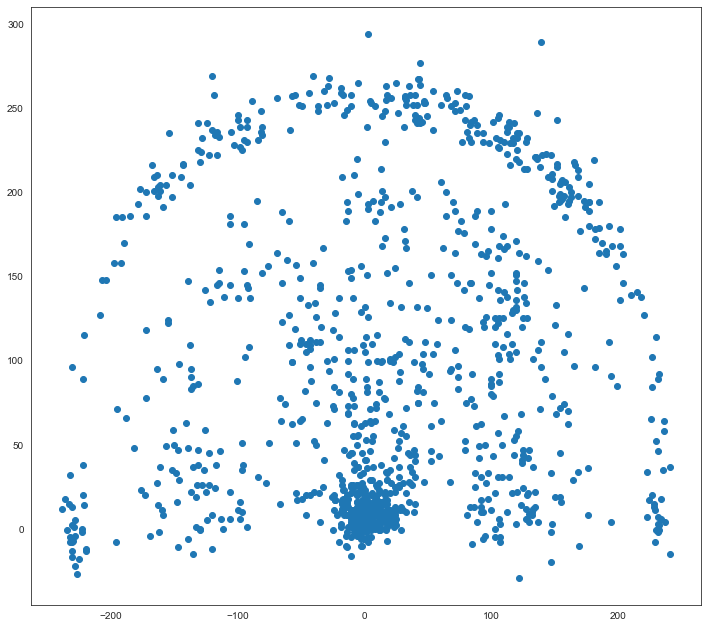

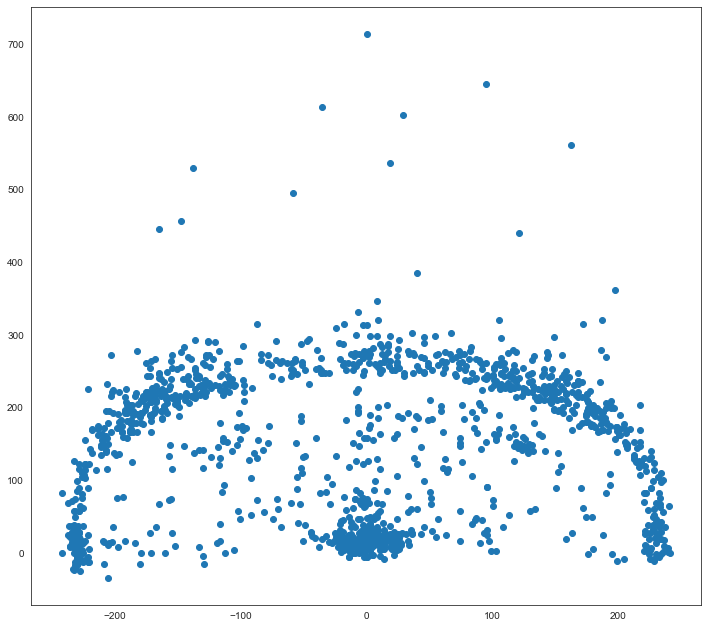

In [13]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shots1_df.LOC_X, shots1_df.LOC_Y)
plt.show()
plt.figure(figsize=(12,11))
plt.scatter(shots2_df.LOC_X, shots2_df.LOC_Y)
plt.show()

In [14]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
        
    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)
    
      # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)
    
     # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

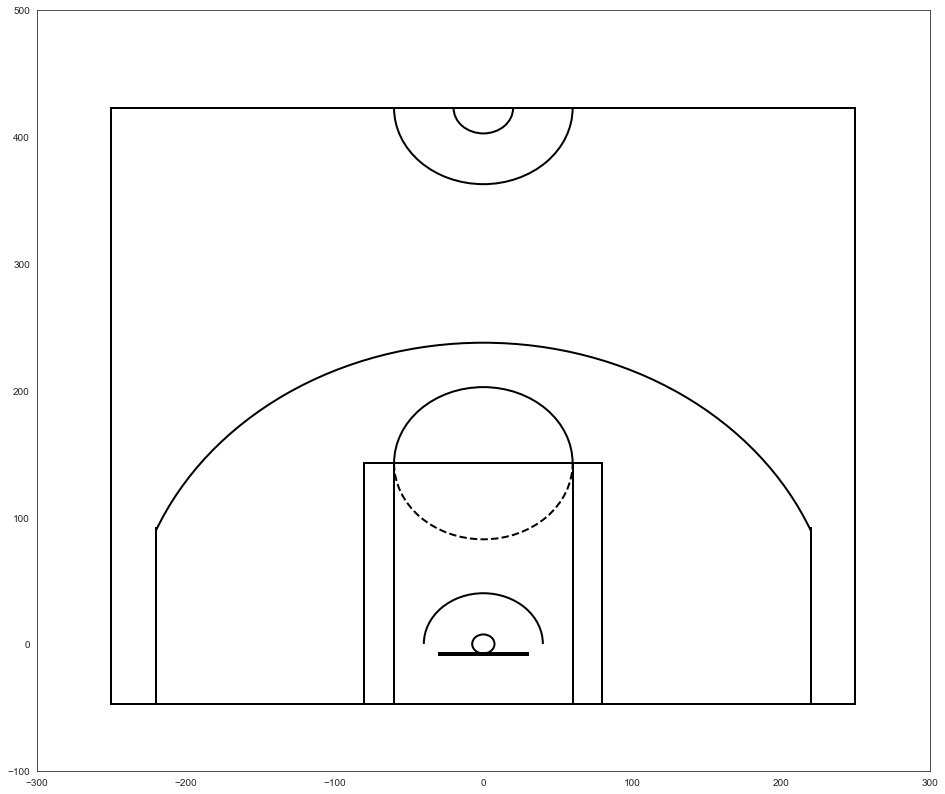

In [15]:
plt.figure(figsize=(16,14))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

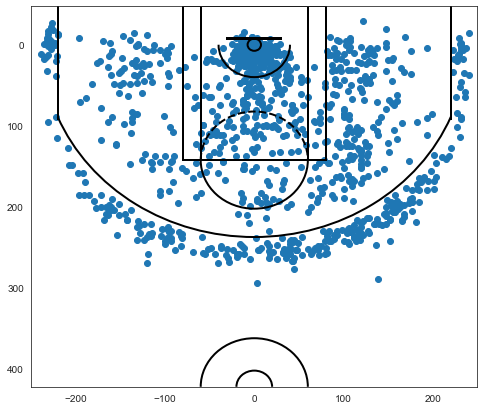

In [16]:
plt.figure(figsize=(8,7))
plt.scatter(shots1_df.LOC_X, shots1_df.LOC_Y)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

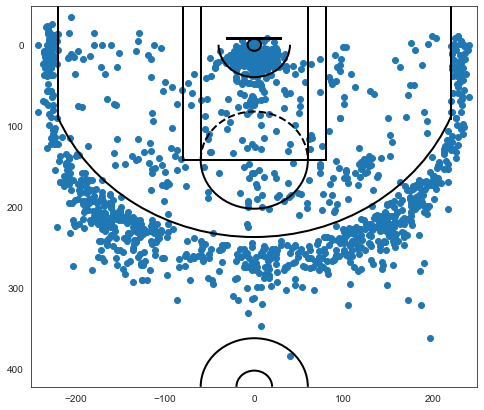

In [17]:
plt.figure(figsize=(8,7))
plt.scatter(shots2_df.LOC_X, shots2_df.LOC_Y)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

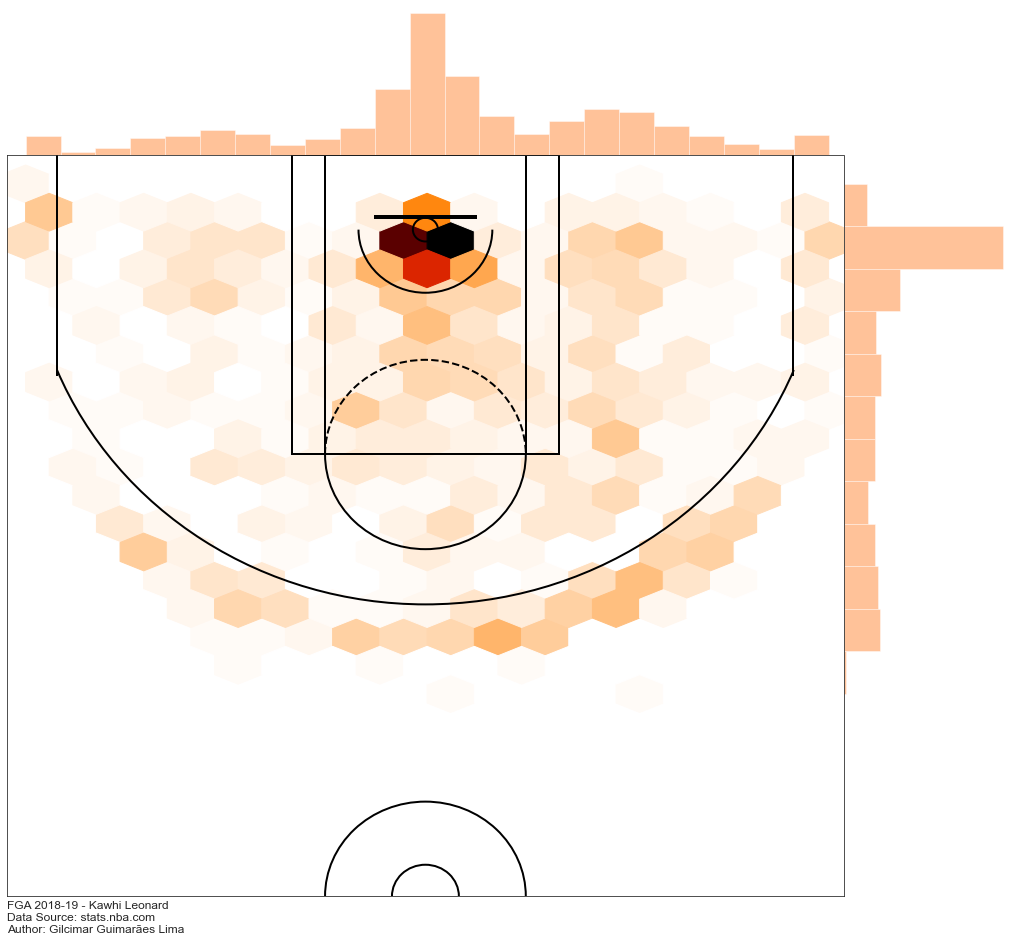

In [18]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(shots1_df.LOC_X, shots1_df.LOC_Y,
                                 kind='hex', space=0, color=cmap(.3), cmap=cmap)

joint_shot_chart.fig.set_size_inches(16,14)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('FGA 2018-19 - Kawhi Leonard', y=1.2, fontsize=14)

# Add Data Source and Author
ax.text(-250,445,'FGA 2018-19 - Kawhi Leonard \nData Source: stats.nba.com'
        '\nAuthor: Gilcimar Guimarães Lima', fontsize=12)


plt.show()

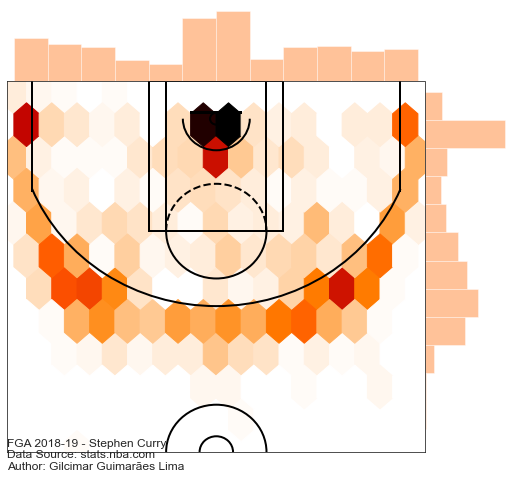

In [19]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(x = shots2_df.LOC_X,y = shots2_df.LOC_Y,
                                 kind='hex', space=0, color=cmap(.3), cmap=cmap)

joint_shot_chart.fig.set_size_inches(8,7)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('FGA 2018-19 - Stephen Curry', y=1.2, fontsize=10)

# Add Data Source and Author
ax.text(-250,445,'FGA 2018-19 - Stephen Curry \nData Source: stats.nba.com'
        '\nAuthor: Gilcimar Guimarães Lima', fontsize=12)


plt.show()

In [20]:
shots1_df.SHOT_ZONE_RANGE.unique()

array(['16-24 ft.', '8-16 ft.', 'Less Than 8 ft.', '24+ ft.'],
      dtype=object)

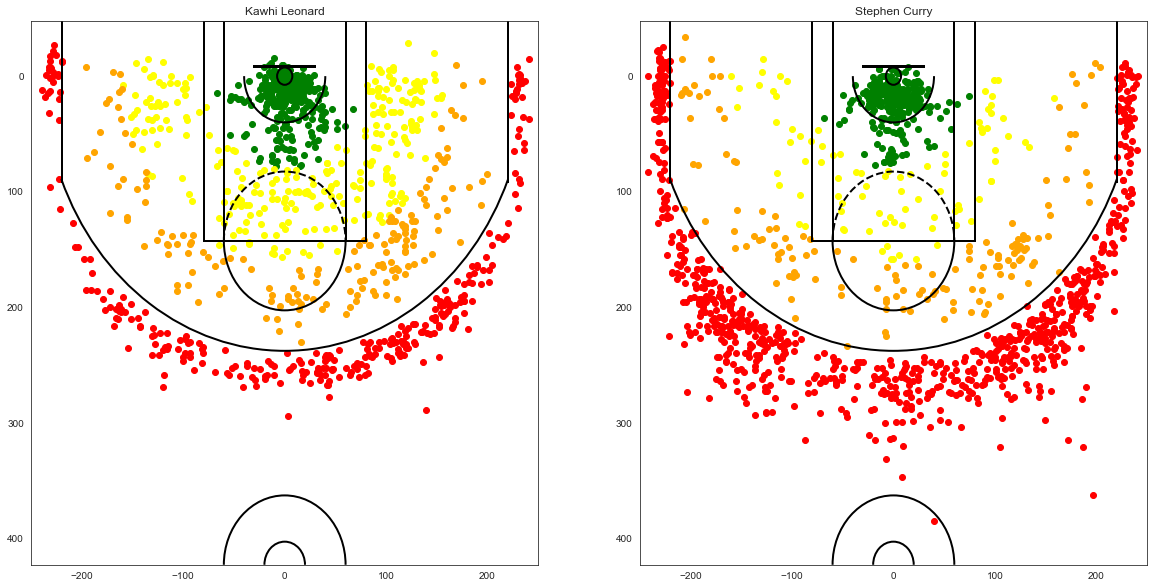

In [21]:
range_1 = 'Less Than 8 ft.'
range_2 = '8-16 ft.'
range_3 = '16-24 ft.'
range_4 = '24+ ft.'
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].scatter(shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_1,'LOC_X'], shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_1,'LOC_Y'], color='green')
ax[0].scatter(shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_2,'LOC_X'], shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_2,'LOC_Y'], color='yellow')
ax[0].scatter(shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_3,'LOC_X'], shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_3,'LOC_Y'], color='orange')
ax[0].scatter(shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_4,'LOC_X'], shots1_df.loc[shots1_df.SHOT_ZONE_RANGE==range_4,'LOC_Y'], color='red')
ax[0] = draw_court(ax[0])
# Adjust plot limits to just fit in half court
ax[0].set_xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
ax[0].set_ylim(422.5, -47.5)
ax[0].set_title(shots1_df.PLAYER_NAME[0])
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)

ax[1].scatter(shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_1,'LOC_X'], shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_1,'LOC_Y'], color='green')
ax[1].scatter(shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_2,'LOC_X'], shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_2,'LOC_Y'], color='yellow')
ax[1].scatter(shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_3,'LOC_X'], shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_3,'LOC_Y'], color='orange')
ax[1].scatter(shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_4,'LOC_X'], shots2_df.loc[shots2_df.SHOT_ZONE_RANGE==range_4,'LOC_Y'], color='red')
ax[1] = draw_court(ax[1])
# Adjust plot limits to just fit in half court
ax[1].set_xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
ax[1].set_ylim(422.5, -47.5)
ax[1].set_title(shots2_df.PLAYER_NAME[0])
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)

plt.show();